<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(_2_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.8_n20.csv',
 'data_add_delta_-2.8_n30.csv',
 'data_add_delta_-2.8_n60.csv',
 'data_add_delta_-2.8_n120.csv',
 'data_add_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.159503,84.041515,28.243779,37.479897,0.000245,204.924939,204.923372,0.001566
1,0.0,1.0,71.746582,23.412244,56.159668,81.021234,0.010107,242.349835,242.341900,0.007935
2,0.0,2.0,72.835067,42.026817,33.351798,74.968003,0.013975,233.195661,233.184430,0.011231
3,0.0,3.0,41.477889,94.558543,24.690261,41.622768,-0.000839,212.348622,212.348451,0.000171
4,0.0,4.0,25.688058,24.733032,28.293732,35.216784,-0.014289,123.917318,123.926610,-0.009292
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.272661,60.749055,89.787997,74.930861,-0.001485,258.739089,258.739862,-0.000773
19996,999.0,16.0,60.165518,29.912703,48.730358,25.499260,0.001898,174.309737,174.306520,0.003217
19997,999.0,17.0,91.537818,31.480605,72.025308,41.629727,-0.009442,246.664016,246.672696,-0.008680
19998,999.0,18.0,49.543834,31.063851,36.273478,44.814574,-0.007793,171.687944,171.695479,-0.007535


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.159503,84.041515,28.243779,37.479897,0.000245,204.924939,204.923372,0.001566
1,0.0,1.0,71.746582,23.412244,56.159668,81.021234,0.010107,242.349835,242.341900,0.007935
2,0.0,2.0,72.835067,42.026817,33.351798,74.968003,0.013975,233.195661,233.184430,0.011231
3,0.0,3.0,41.477889,94.558543,24.690261,41.622768,-0.000839,212.348622,212.348451,0.000171
4,0.0,4.0,25.688058,24.733032,28.293732,35.216784,-0.014289,123.917318,123.926610,-0.009292
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.272661,60.749055,89.787997,74.930861,-0.001485,258.739089,258.739862,-0.000773
19996,999.0,16.0,60.165518,29.912703,48.730358,25.499260,0.001898,174.309737,174.306520,0.003217
19997,999.0,17.0,91.537818,31.480605,72.025308,41.629727,-0.009442,246.664016,246.672696,-0.008680
19998,999.0,18.0,49.543834,31.063851,36.273478,44.814574,-0.007793,171.687944,171.695479,-0.007535


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.159503  84.041515  28.243779  37.479897  0.000245  204.924939   
      1.0    71.746582  23.412244  56.159668  81.021234  0.010107  242.349835   
      2.0    72.835067  42.026817  33.351798  74.968003  0.013975  233.195661   
      3.0    41.477889  94.558543  24.690261  41.622768 -0.000839  212.348622   
      4.0    25.688058  24.733032  28.293732  35.216784 -0.014289  123.917318   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.272661  60.749055  89.787997  74.930861 -0.001485  258.739089   
      16.0   60.165518  29.912703  48.730358  25.499260  0.001898  174.309737   
      17.0   91.537818  31.480605  72.025308  41.629727 -0.009442  246.664016   
      18.0   49.543834  31.063851  36.273478  44.814574 -0.007793  171.687944   
      19.0   89.242547  67.732547  80.156220  26.759038 -0.002463  273.887890   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.923372  0.001566  
      1.0    242.341900  0.007935  
      2.0    233.184430  0.011231  
      3.0    212.348451  0.000171  
      4.0    123.926610 -0.009292  
...                 ...       ...  
999.0 15.0   258.739862 -0.000773  
      16.0   174.306520  0.003217  
      17.0   246.672696 -0.008680  
      18.0   171.695479 -0.007535  
      19.0   273.887716  0.000174  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.159503  84.041515  28.243779  37.479897  0.000245  204.924939   
      1.0    71.746582  23.412244  56.159668  81.021234  0.010107  242.349835   
      2.0    72.835067  42.026817  33.351798  74.968003  0.013975  233.195661   
      3.0    41.477889  94.558543  24.690261  41.622768 -0.000839  212.348622   
      4.0    25.688058  24.733032  28.293732  35.216784 -0.014289  123.917318   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.272661  60.749055  89.787997  74.930861 -0.001485  258.739089   
      16.0   60.165518  29.912703  48.730358  25.499260  0.001898  174.309737   
      17.0   91.537818  31.480605  72.025308  41.629727 -0.009442  246.664016   
      18.0   49.543834  31.063851  36.273478  44.814574 -0.007793  171.687944   
      19.0   89.242547  67.732547  80.156220  26.759038 -0.002463  273.887890   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.923372  0.001566  
      1.0    242.341900  0.007935  
      2.0    233.184430  0.011231  
      3.0    212.348451  0.000171  
      4.0    123.926610 -0.009292  
...                 ...       ...  
999.0 15.0   258.739862 -0.000773  
      16.0   174.306520  0.003217  
      17.0   246.672696 -0.008680  
      18.0   171.695479 -0.007535  
      19.0   273.887716  0.000174  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.159503,84.041515,28.243779,37.479897,0.000245,204.924939,204.923372,0.001566
1,0.0,1.0,71.746582,23.412244,56.159668,81.021234,0.010107,242.349835,242.341900,0.007935
2,0.0,2.0,72.835067,42.026817,33.351798,74.968003,0.013975,233.195661,233.184430,0.011231
3,0.0,3.0,41.477889,94.558543,24.690261,41.622768,-0.000839,212.348622,212.348451,0.000171
4,0.0,4.0,25.688058,24.733032,28.293732,35.216784,-0.014289,123.917318,123.926610,-0.009292
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.272661,60.749055,89.787997,74.930861,-0.001485,258.739089,258.739862,-0.000773
19996,999.0,16.0,60.165518,29.912703,48.730358,25.499260,0.001898,174.309737,174.306520,0.003217
19997,999.0,17.0,91.537818,31.480605,72.025308,41.629727,-0.009442,246.664016,246.672696,-0.008680
19998,999.0,18.0,49.543834,31.063851,36.273478,44.814574,-0.007793,171.687944,171.695479,-0.007535


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.159503  84.041515  28.243779  37.479897  0.000245  204.924939   
      1.0    71.746582  23.412244  56.159668  81.021234  0.010107  242.349835   
      2.0    72.835067  42.026817  33.351798  74.968003  0.013975  233.195661   
      3.0    41.477889  94.558543  24.690261  41.622768 -0.000839  212.348622   
      4.0    25.688058  24.733032  28.293732  35.216784 -0.014289  123.917318   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.272661  60.749055  89.787997  74.930861 -0.001485  258.739089   
      16.0   60.165518  29.912703  48.730358  25.499260  0.001898  174.309737   
      17.0   91.537818  31.480605  72.025308  41.629727 -0.009442  246.664016   
      18.0   49.543834  31.063851  36.273478  44.814574 -0.007793  171.687944   
      19.0   89.242547  67.732547  80.156220  26.759038 -0.002463  273.887890   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.923372  0.001566  
      1.0    242.341900  0.007935  
      2.0    233.184430  0.011231  
      3.0    212.348451  0.000171  
      4.0    123.926610 -0.009292  
...                 ...       ...  
999.0 15.0   258.739862 -0.000773  
      16.0   174.306520  0.003217  
      17.0   246.672696 -0.008680  
      18.0   171.695479 -0.007535  
      19.0   273.887716  0.000174  

[20000 rows x 8 columns]

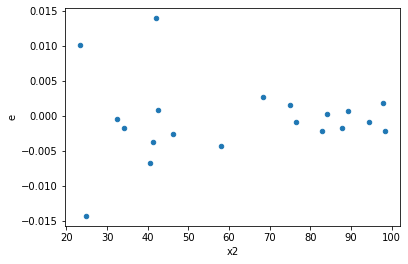

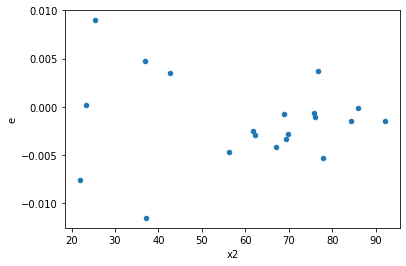

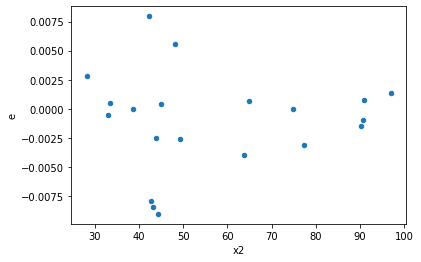

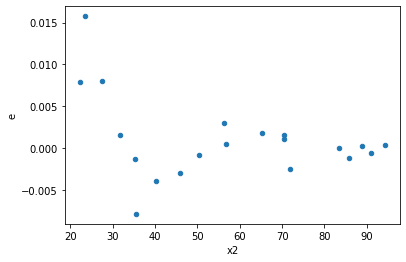

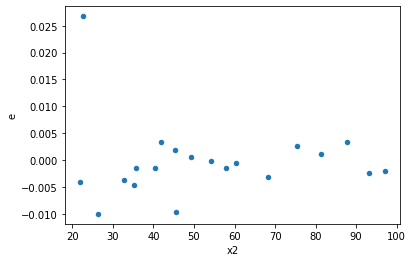

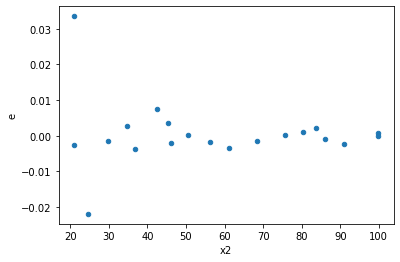

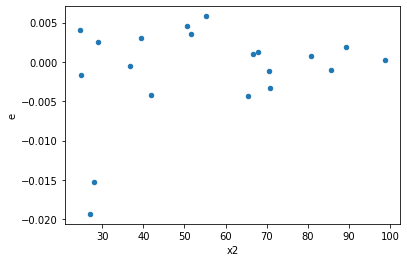

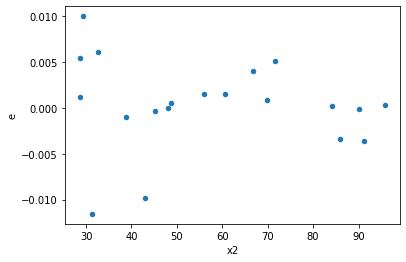

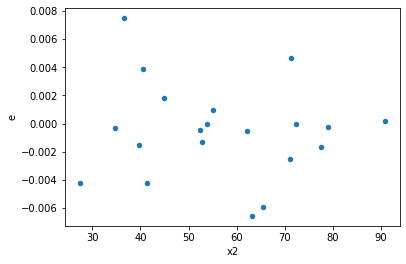

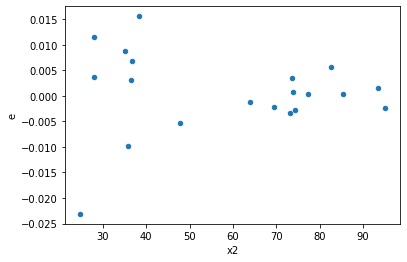

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
8.0,4.0,4.0,4.590906711982862e-05,5.972613472636893e-05,1.1477266779957155e-05,1.4931533681592232e-05,1.3009659850084945,0.8049191394608732,0.5975404302695634,0.4024595697304366,Reject005=1 : Homoscedasticity
36.0,4.0,4.0,2.364218196141554e-05,2.6308621652150085e-05,5.910545490353885e-06,6.577155413037521e-06,1.112783147303672,0.9200040810078747,0.5399979594960627,0.46000204050393734,Reject005=1 : Homoscedasticity
38.0,4.0,4.0,7.031273392646017e-06,2.4066155638968466e-05,1.7578183481615042e-06,6.016538909742116e-06,3.4227307480518636,0.26050300734030163,0.8697484963298492,0.13025150367015081,Reject005=1 : Homoscedasticity
70.0,4.0,4.0,5.133427101221545e-06,3.8981067343456344e-05,1.2833567753053862e-06,9.745266835864086e-06,7.593575709720404,0.0749434018646753,0.9625282990676624,0.03747170093233765,Reject005=1 : Homoscedasticity
86.0,4.0,4.0,1.0013845612541105e-05,3.322294333675867e-05,2.5034614031352764e-06,8.305735834189668e-06,3.3177007737318256,0.2721507377978871,0.8639246311010564,0.13607536889894356,Reject005=1 : Homoscedasticity
169.0,4.0,4.0,1.4959259578549683e-05,1.9601008232927138e-05,3.739814894637421e-06,4.9002520582317845e-06,1.3102926739123726,0.799748164664285,0.6001259176678575,0.3998740823321425,Reject005=1 : Homoscedasticity
239.0,4.0,4.0,1.2949161176381814e-05,1.8219610129340493e-05,3.2372902940954535e-06,4.554902532335123e-06,1.407010838862021,0.7487765863466551,0.6256117068266724,0.37438829317332756,Reject005=1 : Homoscedasticity
284.0,4.0,4.0,1.92203961584999e-05,2.6559748260247438e-05,4.805099039624975e-06,6.6399370650618595e-06,1.3818522803184694,0.7615841641684518,0.6192079179157741,0.3807920820842259,Reject005=1 : Homoscedasticity
292.0,4.0,4.0,3.364977754895366e-05,5.7835692198165605e-05,8.412444387238415e-06,1.4458923049541401e-05,1.718754072416268,0.6126851170927661,0.693657441453617,0.30634255854638304,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,0.00017400982227560135,7.08566477882194e-06,4.350245556890034e-05,1.771416194705485e-06,0.04071991273917559,0.00894578586700576,Reject005=0 : Heteroscedasticity
1.0,4.0,4.0,0.00016965516235695598,2.5226149017385056e-05,4.2413790589238995e-05,6.306537254346264e-06,0.1486907245669838,0.09185830200914291,Reject005=1 : Homoscedasticity
2.0,4.0,4.0,0.0001457162401762924,1.0160004853258985e-05,3.64290600440731e-05,2.5400012133147463e-06,0.06972458828862912,0.024382901836431603,Reject005=0 : Heteroscedasticity
3.0,4.0,4.0,8.250371813529459e-05,2.8586557698284103e-06,2.0625929533823648e-05,7.146639424571026e-07,0.03464881140436136,0.0065786416071572295,Reject005=0 : Heteroscedasticity
4.0,4.0,4.0,0.0003985666413970981,7.505150682203668e-06,9.964166034927452e-05,1.876287670550917e-06,0.018830353327854578,0.0020243239646605456,Reject005=0 : Heteroscedasticity
5.0,4.0,4.0,0.000569163210033255,3.1371844706696554e-06,0.00014229080250831376,7.842961176674138e-07,0.005511924199187709,0.00017963594722256008,Reject005=0 : Heteroscedasticity
6.0,4.0,4.0,0.00025018105022396245,5.6899945783373895e-06,6.254526255599061e-05,1.4224986445843474e-06,0.022743507444883206,0.0029231155393002347,Reject005=0 : Heteroscedasticity
7.0,4.0,4.0,1.6794246065181918e-05,1.1017421819190284e-05,4.1985615162954795e-06,2.754355454797571e-06,0.6560236033478019,0.6929124261093816,Reject005=1 : Homoscedasticity
8.0,4.0,4.0,4.590906711982862e-05,5.972613472636893e-05,1.1477266779957155e-05,1.4931533681592232e-05,1.3009659850084945,0.8049191394608732,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    555
Reject005=1 : Homoscedasticity      445
Name: Result_test, dtype: int64